In [1]:
using LaTeXStrings, Plots
using LinearAlgebra, Statistics

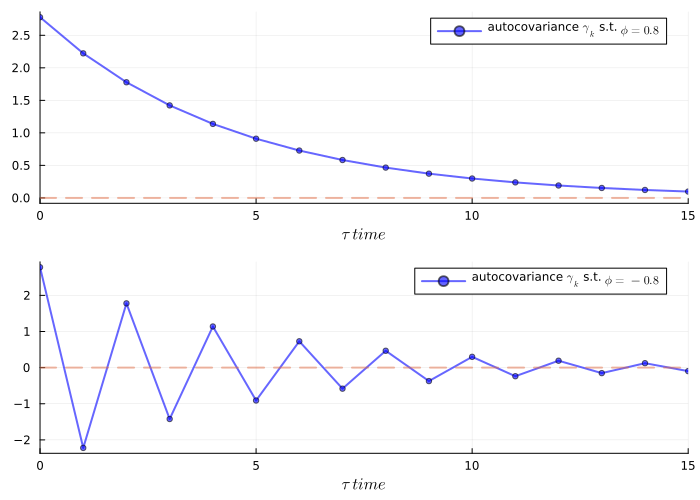

In [25]:
plots = [plot(), plot()]
τ = 0:16
N = enumerate((0.8, -0.8))

for (i, ϕ) in N
    γₖ = [ϕ .^ k ./ (1 - ϕ .^ 2) for k in τ]
    label = L"autocovariance $\gamma_k$ s.t. $\phi = %$ϕ$"
    plot!(plots[i], τ, γₖ
        , color = :blue
        , lw = 2
        , marker = :circle
        , markersize = 3
        , alpha = 0.6
        , label = label
    )
    plot!(plots[i]
        , legend = :topright
        , xlabel = L"\tau \; time"
        , xlim = (0, 15)
    )
    plot!(plots[i], [0]
        , linestyle = :dash, alpha = 0.5
        , seriestype = :hline
        , linewidth = 2
        , label = :none
    )
end
plot(plots[1], plots[2], layout = (2, 1), size = (700, 500))

In [28]:
γₖ(ϕ,  ω) = 1 ./ (1 .- 2 * ϕ * cos.( ω) .+ ϕ .^ 2) # AR1_sd Autocovariance Spectral Density function 

γₖ (generic function with 1 method)

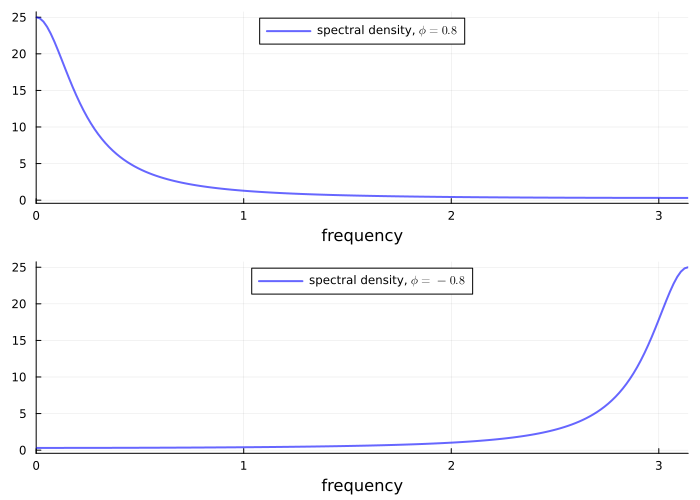

In [29]:
ωₛ = range(0, π, length = 180)
plots = [plot(), plot()]
N = enumerate((0.8, -0.8))

for (i, ϕ) in N
    γ = γₖ(ϕ, ωₛ)
    label = L"spectral density, $\phi = %$ϕ$"
    plot!(plots[i], ωₛ, γ
        , color = :blue
        , alpha = 0.6
        , linewidth = 2
        , label = label
    )
    plot!(plots[i]
        , legend = :top
        , xlabel = "frequency"
        , xlim = (0, π)
    )
end
plot(plots[1], plots[2], layout = (2, 1), size = (700, 500))

In [30]:
ϕ = -0.8
τ = 0:16 # times
γ₁ = [ϕ .^ k ./ (1 - ϕ .^ 2) for k in τ]
γ₂ = [cos.(π * k) for k in τ]
γ₃ = [a * b for (a, b) in zip(γ₁, γ₂)];

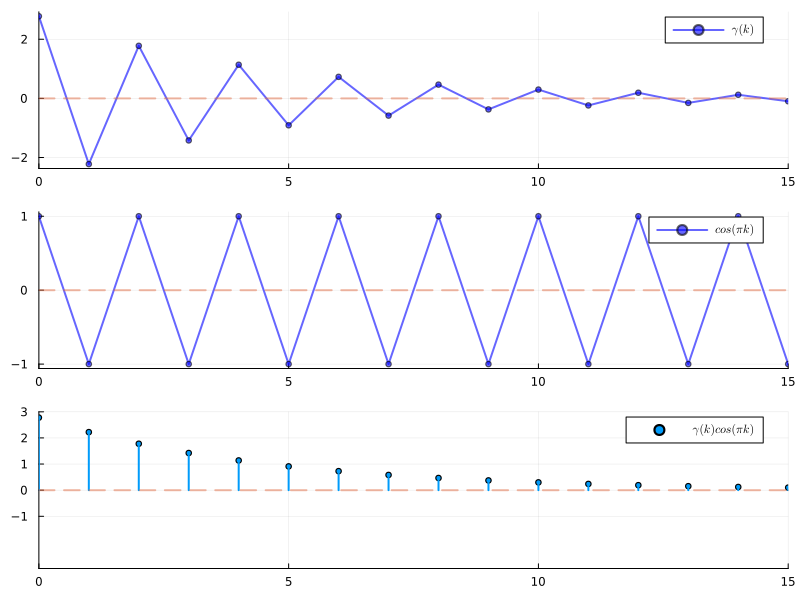

In [31]:
# Autocovariance when \phi = -0.8
plt₁ = plot(τ, γ₁
    , color = :blue
    , linewidth = 2
    , marker = :circle
    , markersize = 3
    , alpha = 0.6
    , label = L"\gamma(k)"
)
plot!(plt₁
    , [0]
    , seriestype = :hline
    , linestyle = :dash
    , linewidth = 2
    , alpha = 0.5
    , label = :none
    , legend = :topright
    , xlim = (0, 15)
    , yticks = [-2, 0, 2]
)

# Cycles at frequence pi
plt₂ = plot(τ, γ₂
    , color = :blue
    , marker = :circle
    , markersize = 3
    , linewidth = 2
    , alpha = 0.6
    , label = L"cos(\pi k)"
)
plot!(plt₂
    , [0]
    , seriestype = :hline
    , linestyle = :dash
    , linewidth = 2
    , alpha = 0.5
    , label = :none
    , legend = :topright
    , xlim = (0, 15), yticks = [-1, 0, 1]
)

# Product
plt₃ = plot(τ, γ₃
    , seriestype = :sticks
    , marker = :circle
    , markersize = 3
    , linewidth = 2
    , label = L"\gamma(k) cos(\pi k)"
)
plot!(plt₃
    , [0]
    , seriestype = :hline
    , linestyle = :dash
    , linewidth = 2
    , alpha = 0.5
    , label = :none
    , legend = :topright
    , xlim = (0, 15), ylim = (-3, 3)
    , yticks = [-1, 0, 1, 2, 3]
)

plot(plt₁, plt₂, plt₃, layout = (3, 1), size = (800, 600))

# References
- [ ] [57. Covariance Stationary Processes](https://julia.quantecon.org/time_series_models/arma.html#id18)